In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import shuffle
from sklearn import svm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support, homogeneity_score, adjusted_mutual_info_score, completeness_score, adjusted_rand_score, v_measure_score
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import FunctionTransformer
from sklearn.utils import shuffle
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
categories = ['alt.atheism',
'comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware',
'comp.windows.x',
'misc.forsale',
'rec.autos',
'rec.motorcycles',
'rec.sport.baseball',
'rec.sport.hockey',
'sci.crypt',
'sci.electronics',
'sci.med',
'sci.space',
'soc.religion.christian',
'talk.politics.guns',
'talk.politics.mideast',
'talk.politics.misc',
'talk.religion.misc']
comb_train_x = []
train_y = []
for i in range(len(categories)):
   temp_cat = []
   temp_cat.append(categories[i])
   temp_train_x = fetch_20newsgroups(subset='all', categories=temp_cat, shuffle=True, random_state=42)
   comb_train_x += temp_train_x.data
   train_y += ([i] * len(temp_train_x.target))

<h3>Creating a TFxIDF vector representation of training and test data</h3><br> A CountVectorizer object is created to first build a vocabulary of words and their respective counts, and then transform the sentences by replacing the words with their respective counts. A TfIdfTransformer object is created and then fit on the training dataset to then extract TfIdf features from each document in both training and test datasets. 

In [3]:
'''
vectorizer = CountVectorizer(min_df = 3)
tfidf_transformer = TfidfTransformer()
vec_train_x = vectorizer.fit_transform(preproc_train_data)
tfidf_train_x = tfidf_transformer.fit_transform(vec_train_x)
'''
vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
tfidf_train_x = vectorizer.fit_transform(comb_train_x)

In [4]:
print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))

Dimensions of the TFIDF matrix are: (18846, 52295)


In [5]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=52)
km.fit(tfidf_train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=52, tol=0.0001, verbose=0)

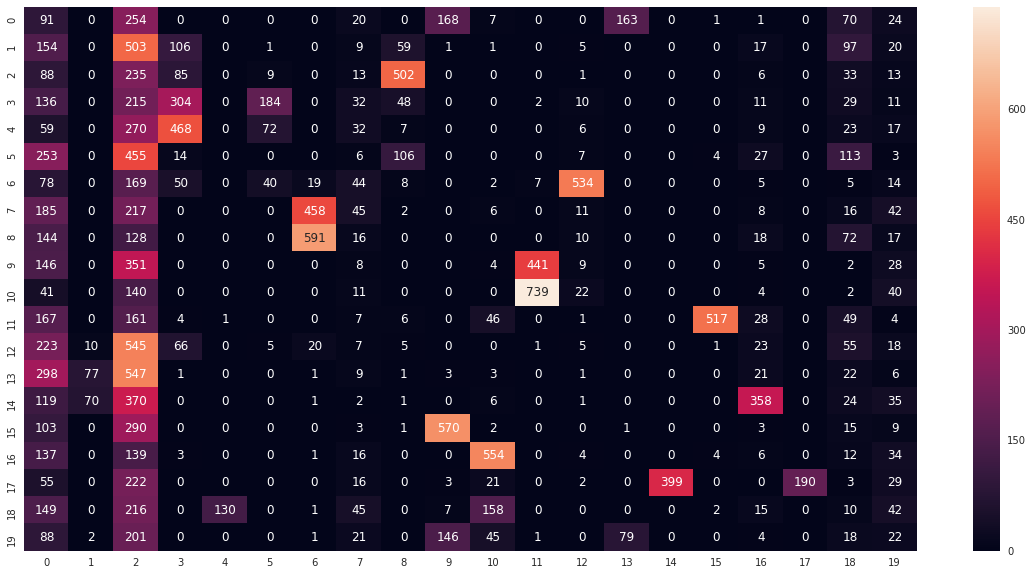

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

In [7]:
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))

Homogeneity: 0.353
Completeness: 0.425
V-measure: 0.386
Adjusted Rand-Index: 0.121
Adjusted Mutual Info: 0.351


In [61]:
var = []
svd_model = TruncatedSVD(n_components=1000)
train_x2 = svd_model.fit_transform(tfidf_train_x)
for r in range(1, 1001):
    var.append(np.sum(svd_model.explained_variance_ratio_[1:r]) * 100)
    print('Variance Ratio: ' , r,  str(np.sum(svd_model.explained_variance_ratio_[1:r]) * 100))

('Variance Ratio: ', 1, '0.0')
('Variance Ratio: ', 2, '0.5166448269466994')
('Variance Ratio: ', 3, '0.880940213329456')
('Variance Ratio: ', 4, '1.23684032326904')
('Variance Ratio: ', 5, '1.5577589460768813')
('Variance Ratio: ', 6, '1.8129471459982098')
('Variance Ratio: ', 7, '2.0623941820891645')
('Variance Ratio: ', 8, '2.303461996191781')
('Variance Ratio: ', 9, '2.5347092978155015')
('Variance Ratio: ', 10, '2.7530014759556174')
('Variance Ratio: ', 11, '2.968684171483466')
('Variance Ratio: ', 12, '3.1785803546556495')
('Variance Ratio: ', 13, '3.3823038359554323')
('Variance Ratio: ', 14, '3.5818094738132222')
('Variance Ratio: ', 15, '3.7791311796262597')
('Variance Ratio: ', 16, '3.971706153604526')
('Variance Ratio: ', 17, '4.162737328705629')
('Variance Ratio: ', 18, '4.349129799436618')
('Variance Ratio: ', 19, '4.533166628852015')
('Variance Ratio: ', 20, '4.7133491780770855')
('Variance Ratio: ', 21, '4.890561297293069')
('Variance Ratio: ', 22, '5.061993138923464')
(

Text(0,0.5,u'Percent of variance retained')

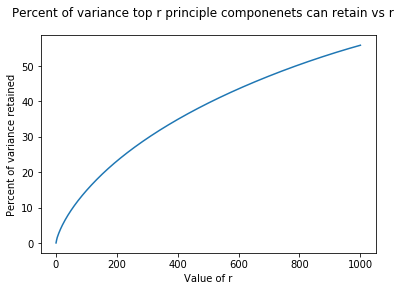

In [63]:
fig = plt.figure()
plt.plot(range(1, 1001), var)
fig.suptitle('Percent of variance top r principle componenets can retain vs r')
plt.xlabel('Value of r')
plt.ylabel('Percent of variance retained')

<h3>Dimensionality Reduction of Training and Test data using Non-Negative Matrix Factorization (NMF)</h3><br>
As the features extracted using TfIdf are both high dimensional and sparse, leading to curse of dimensionality. We perform Non-Negative Matrix Factorization to reduce the number of features. In this method a matrix is factorized into two matrices, with the property that all three matrices have non negative elements.

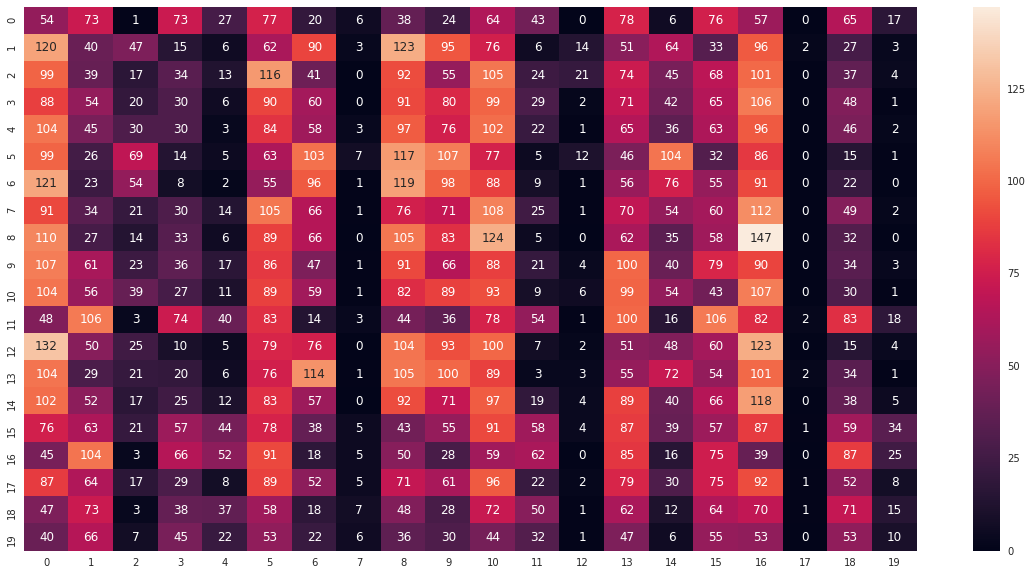

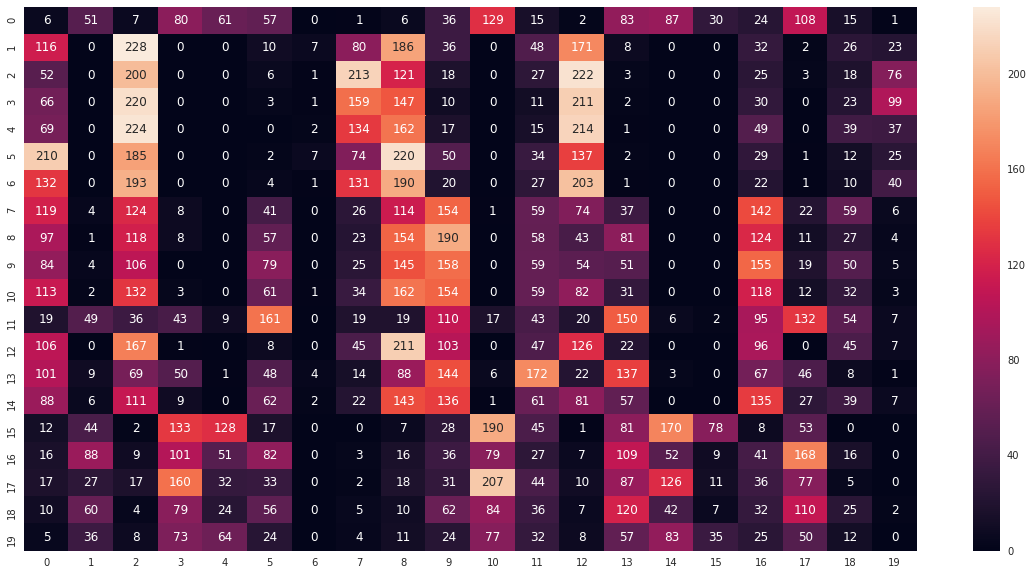

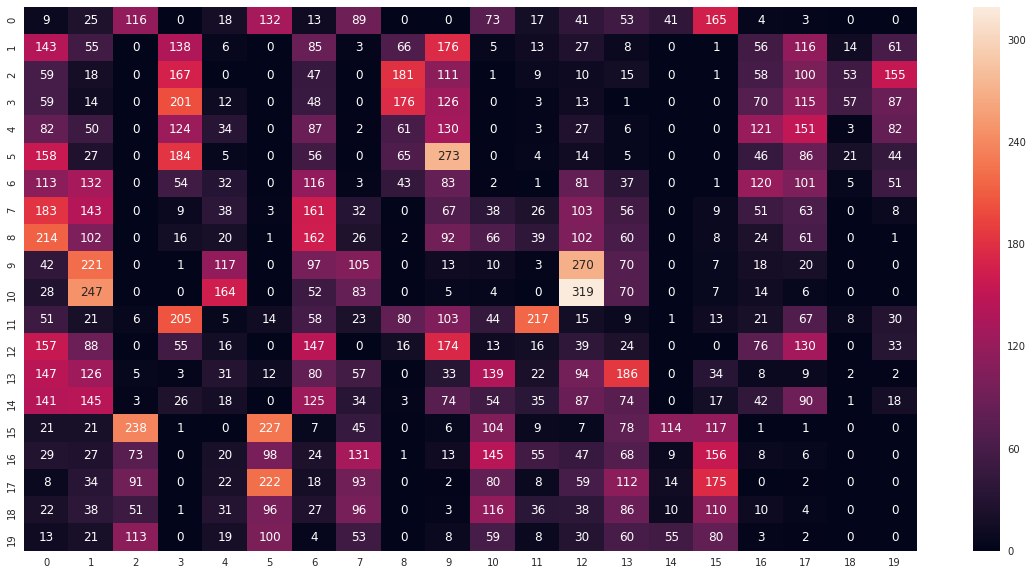

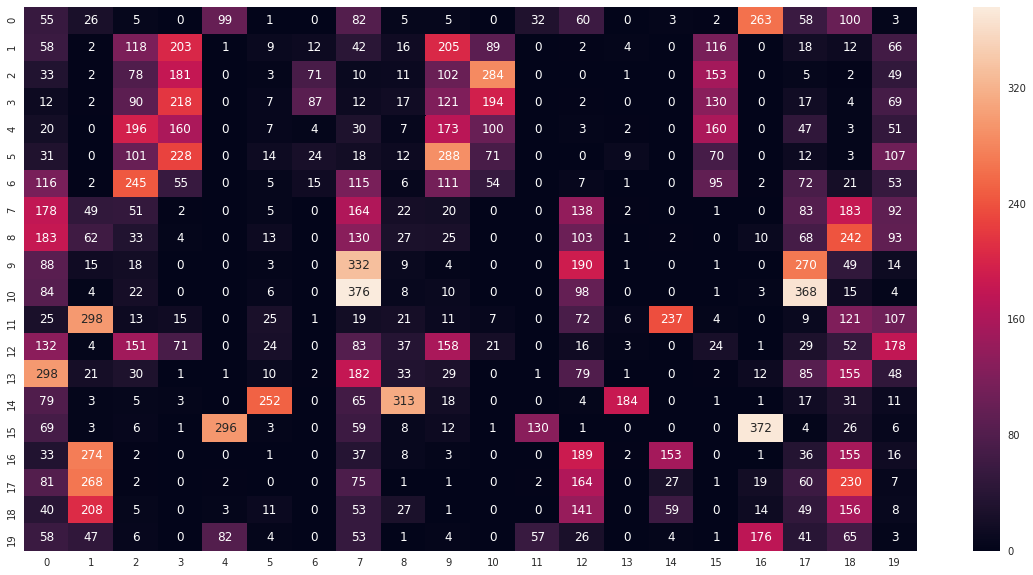

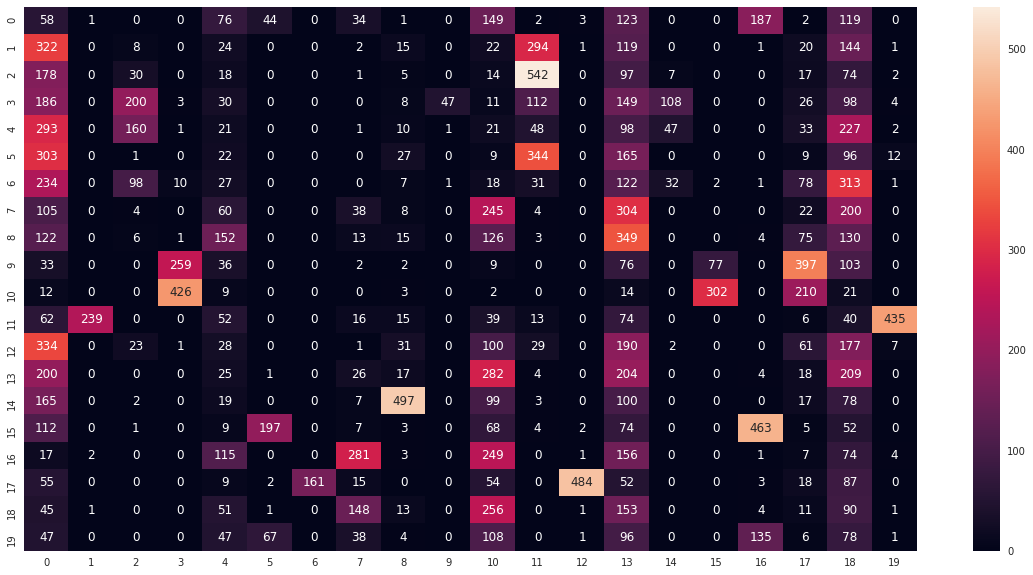

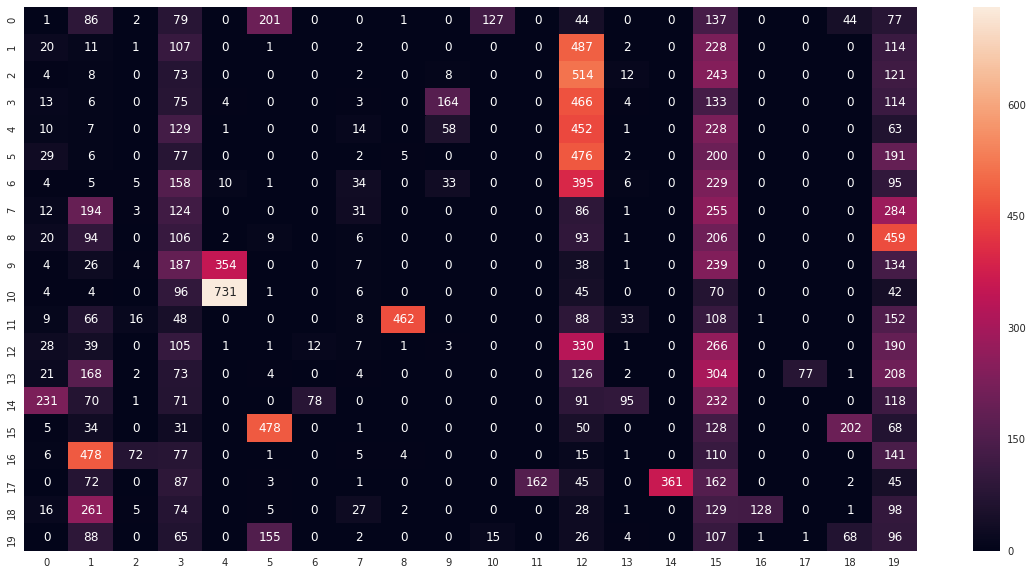

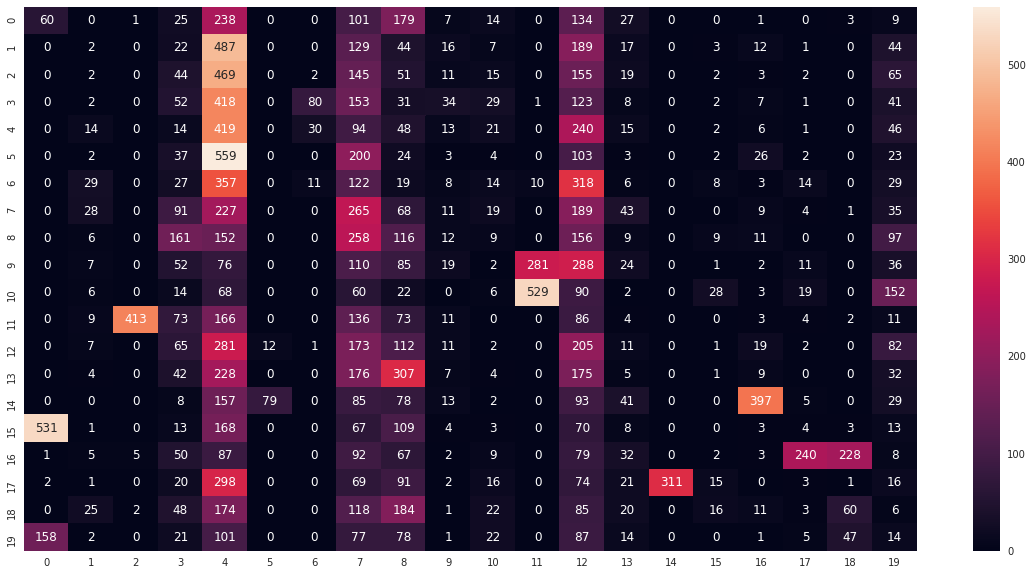

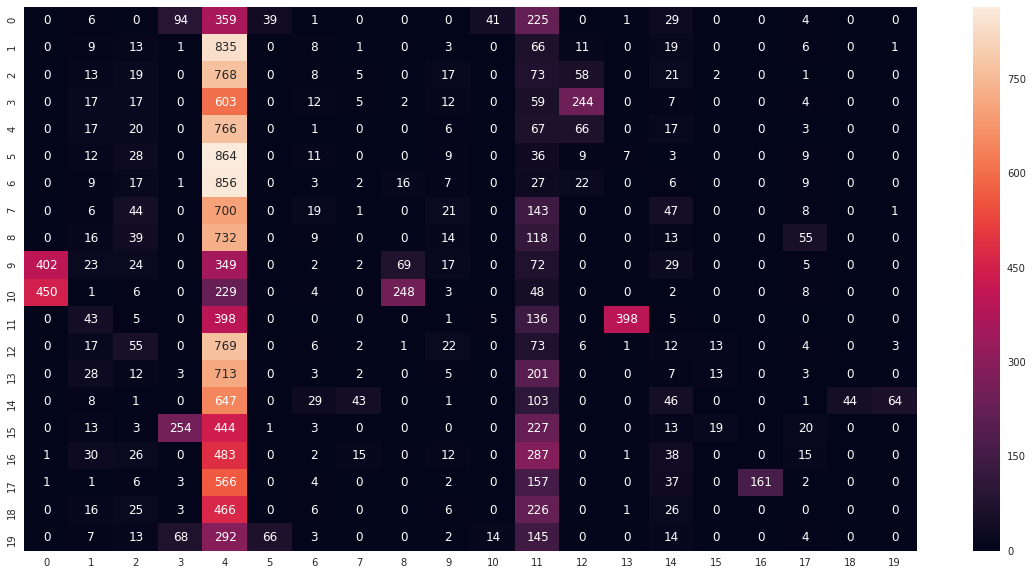

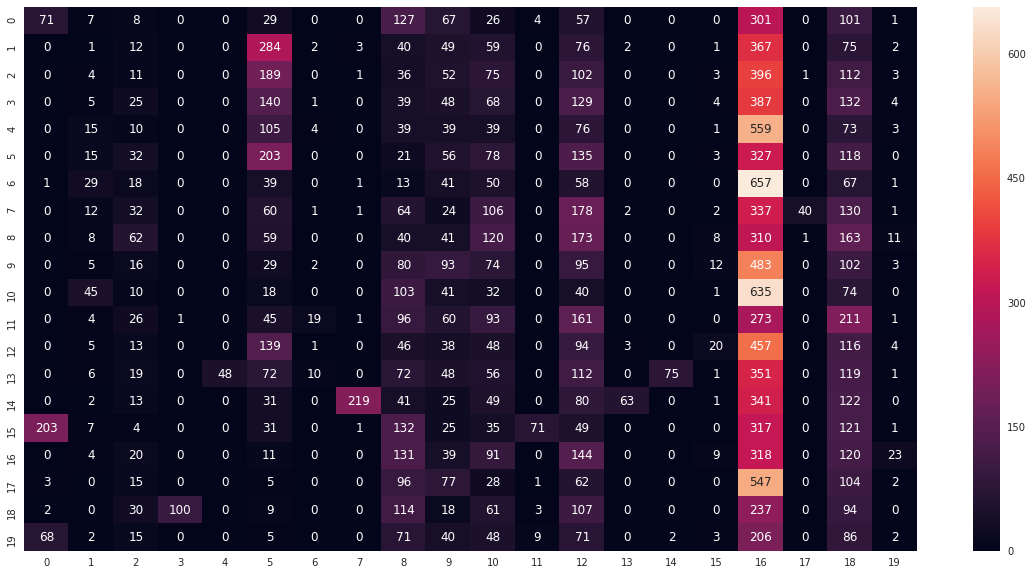

In [8]:
var = []
r_values = [1, 2, 3, 5, 10, 20, 50, 100, 300]
completeness_values = []
homogeneity_values = []
v_measure_values = []
adjusted_rand_values = []
adjusted_mutual_info_values = []
for r in r_values:
    nmf_model = NMF(n_components=r, init='random', random_state=0)
    train_x = nmf_model.fit_transform(tfidf_train_x)
    km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
    km.fit(train_x)
    sns.set()
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
    plt.show()    
    homogeneity_values.append(homogeneity_score(train_y, km.labels_))
    completeness_values.append(completeness_score(train_y, km.labels_))
    v_measure_values.append(v_measure_score(train_y, km.labels_))
    adjusted_rand_values.append(adjusted_rand_score(train_y, km.labels_))
    adjusted_mutual_info_values.append(adjusted_mutual_info_score(train_y, km.labels_))

In [15]:
nmf_model = NMF(n_components=2)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
print('Contingency Matrix for r: ' + str(2) + '\n' + str(contingency_matrix(train_y, km.labels_)))

print('Dimensions of the TFIDF matrix are: ' + str(tfidf_train_x.shape))

Homogeneity: 0.169
Completeness: 0.180
V-measure: 0.175
Adjusted Rand-Index: 0.051
Adjusted Mutual Info: 0.167
Contingency Matrix for r: 2
[[ 44  93   1  84   2 112  19  29  18   0   5  74 117   0  12  63  49  50
   21   6]
 [ 32   0  45   5 193   0  54   0  14 151 120   0   0   7  71   3   0   8
   22 248]
 [ 10   0 147   3 118   0  51   0  14 273  58   0   0   1  40   1   0   5
   18 246]
 [  2   0 145   1 149   0  63   0  10 231  54   1   0   2  54   0   0   2
   15 253]
 [ 10   0  82   0 165   0  88   0  12 209  65   0   0   2  60   1   0   2
   19 248]
 [ 18   0  49   0 226   0  41   0   8 123 179   0   0   7 106   1   0   4
   18 208]
 [ 17   0  89   2 208   0  22   0   7 193 116   0   0   1  48   0   0   2
   16 254]
 [ 83   1  12  27  79   2 111   0  63  43  95  10   6   0 151  15   0  48
  140 104]
 [120   0   9  33  92   0  74   0  40  35  71  22   2   0 172   7   0  92
  130  97]
 [ 91   0   6  44  96   0  91   0  70  50  78   3   0   0 137  19   1  77
  141  90]
 [ 62   0  

Homogeneity: 0.317
Completeness: 0.357
V-measure: 0.336
Adjusted Rand-Index: 0.124
Adjusted Rand-Index: 0.315


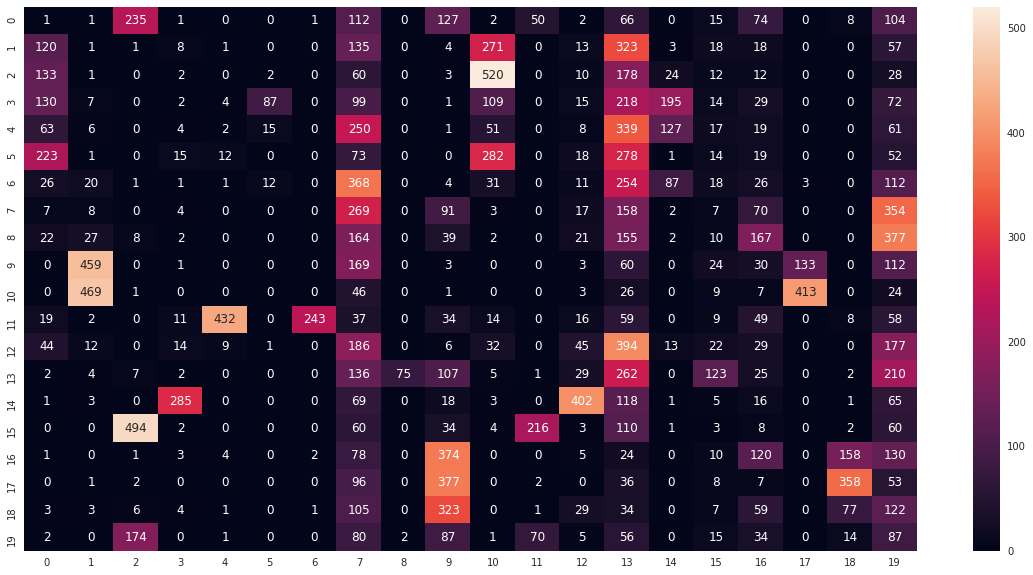

In [13]:
nmf_model = NMF(n_components=10, random_state=35)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

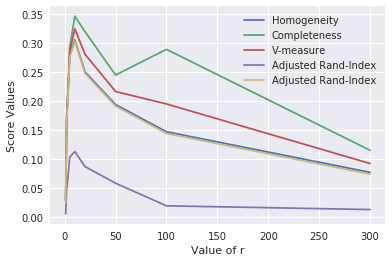

In [14]:
plt.plot(r_values, homogeneity_values)
plt.plot(r_values, completeness_values)
plt.plot(r_values, v_measure_values)
plt.plot(r_values, adjusted_rand_values)
plt.plot(r_values, adjusted_mutual_info_values)
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand-Index', 'Adjusted Rand-Index'])
plt.xlabel('Value of r')
plt.ylabel('Score Values')
plt.show()

Text(0,0.5,u'Homogeneity Values')

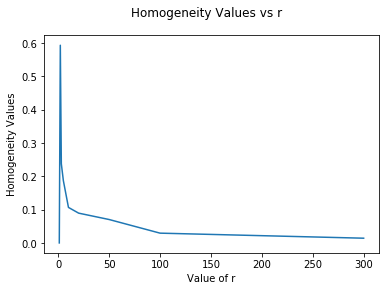

In [39]:
fig = plt.figure()
plt.plot(r_values, homogeneity_values)
fig.suptitle('Homogeneity Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Homogeneity Values')

Text(0,0.5,u'Completeness Values')

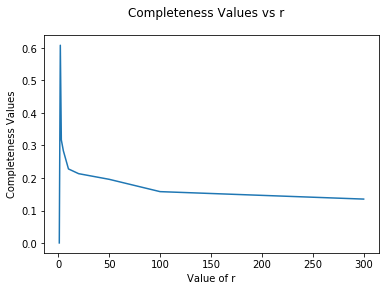

In [40]:
fig = plt.figure()
plt.plot(r_values, completeness_values)
fig.suptitle('Completeness Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Completeness Values')

Text(0,0.5,u'V Measure Values')

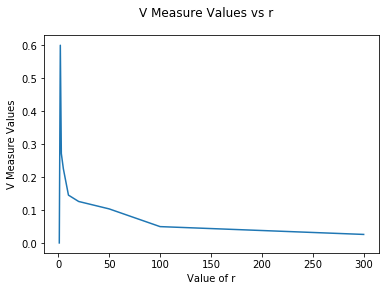

In [41]:
fig = plt.figure()

plt.plot(r_values, v_measure_values)
fig.suptitle('V Measure Values vs r')
plt.xlabel('Value of r')
plt.ylabel('V Measure Values')

Text(0,0.5,u'Adjusted Rand Values')

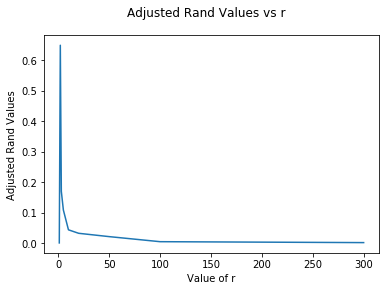

In [42]:
fig = plt.figure()
plt.plot(r_values, adjusted_rand_values)
fig.suptitle('Adjusted Rand Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Adjusted Rand Values')

Text(0,0.5,u'Adjusted Mutual Info Values')

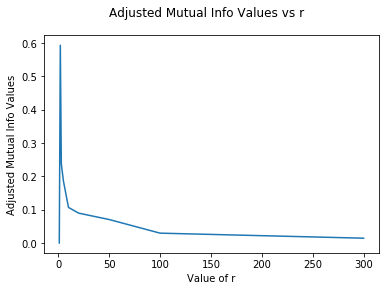

In [43]:
fig = plt.figure()
plt.plot(r_values, adjusted_mutual_info_values)
fig.suptitle('Adjusted Mutual Info Values vs r')
plt.xlabel('Value of r')
plt.ylabel('Adjusted Mutual Info Values')

Best model is obtained for r = 10

Homogeneity: 0.317
Completeness: 0.357
V-measure: 0.336
Adjusted Rand-Index: 0.124
Adjusted Rand-Index: 0.315


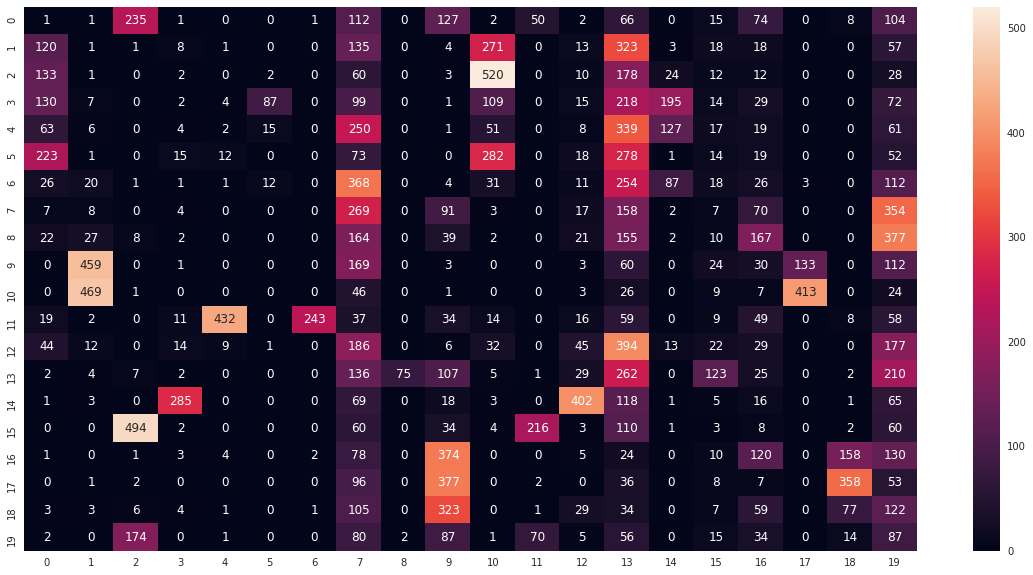

In [15]:
nmf_model = NMF(n_components=10, random_state=35)
train_x = nmf_model.fit_transform(tfidf_train_x)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f" % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

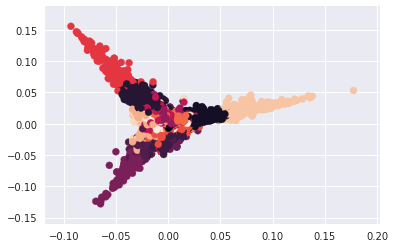

In [17]:
best_train = PCA(n_components = 2).fit_transform(train_x)

#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(best_train[:, 0], best_train[:, 1], c=km.labels_)

plt.show()

<h3>Normalizing Features</h3>

Homogeneity: 0.315
Completeness: 0.355
V-measure: 0.334
Adjusted Rand-Index: 0.122
Adjusted Mutual Info: 0.313


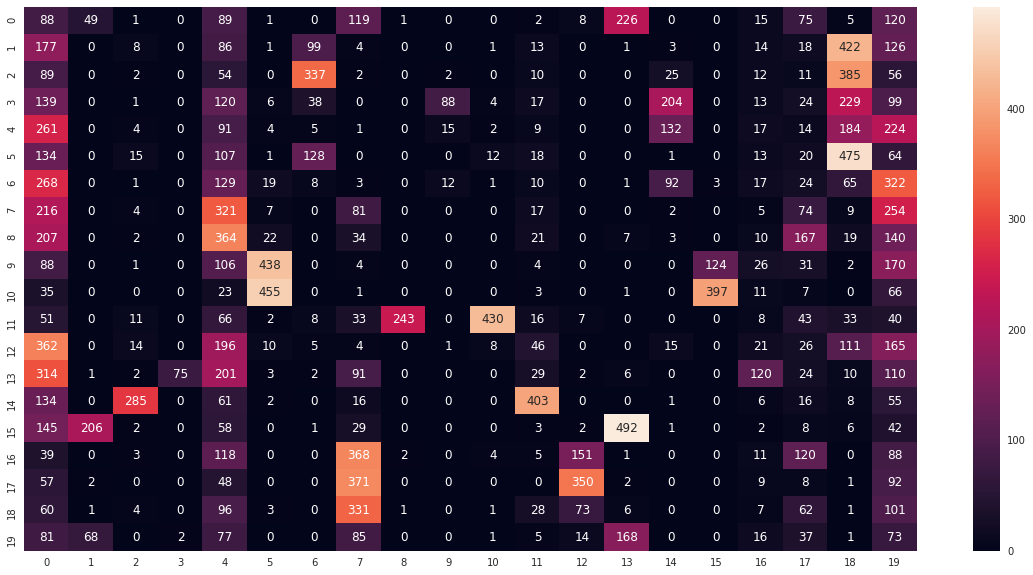

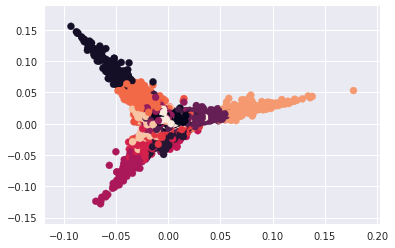

In [22]:
normalized_train_x = normalize(train_x, norm='l2', axis=0)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(normalized_train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

best_train = PCA(n_components = 2).fit_transform(train_x)

#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(best_train[:, 0], best_train[:, 1], c=km.labels_)

plt.show()

<h3>Logarithmic Transformation</h3>

In [28]:
print(train_x)

[[0.02729578 0.00991328 0.00902945]
 [0.01878186 0.         0.18879377]
 [0.04183361 0.         0.00518696]
 ...
 [0.0231426  0.02223406 0.00027609]
 [0.00490784 0.03083239 0.01204874]
 [0.01873975 0.0112075  0.        ]]


Homogeneity: 0.375
Completeness: 0.378
V-measure: 0.377
Adjusted Rand-Index: 0.212
Adjusted Mutual Info: 0.373


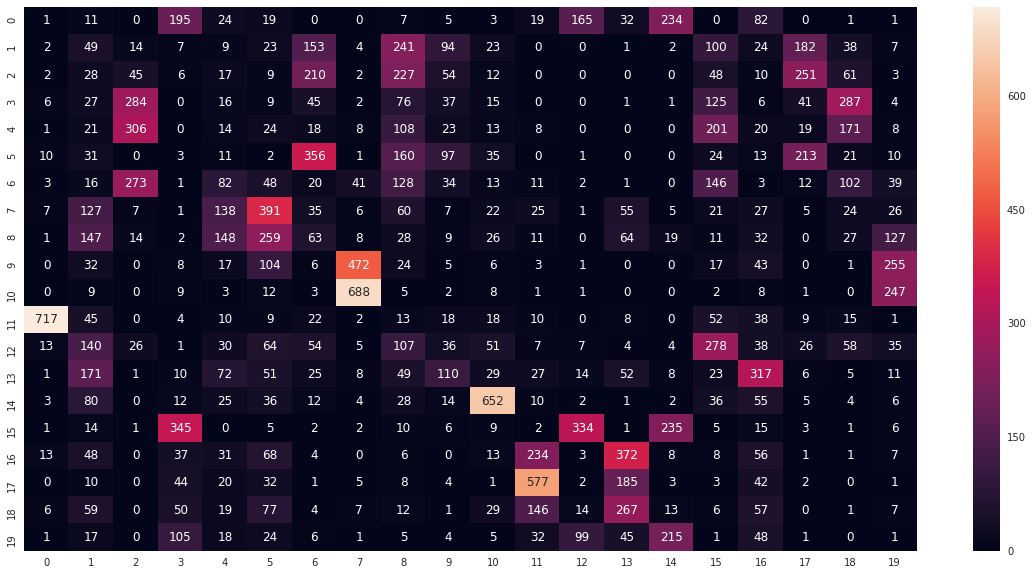

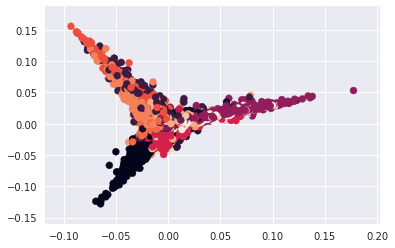

In [23]:
log_train_x = np.log(train_x + 1e-3)
#print(log_train_x)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=35)
km.fit(log_train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

best_train = PCA(n_components = 2).fit_transform(train_x)

#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(best_train[:, 0], best_train[:, 1], c=km.labels_)

plt.show()

<h3>Normalizing Features And Logarithmic Transformation</h3>

Homogeneity: 0.385
Completeness: 0.385
V-measure: 0.385
Adjusted Rand-Index: 0.218
Adjusted Mutual Info: 0.383


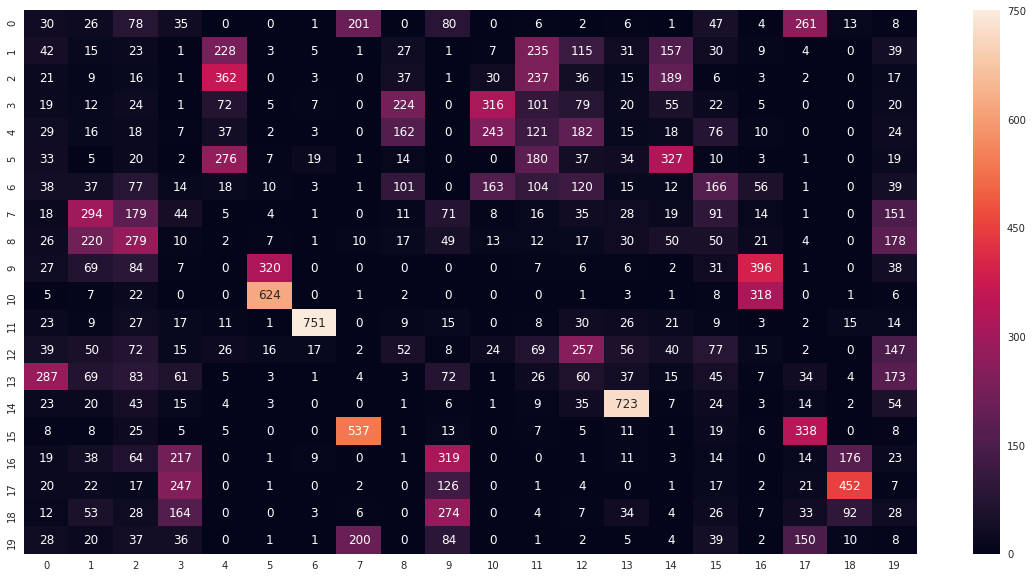

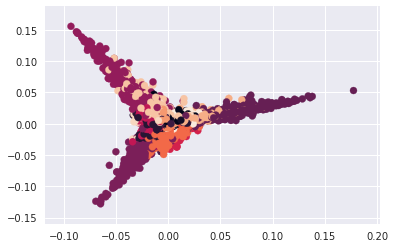

In [24]:
normalized_train_x = normalize(train_x, norm='l2')
log_train_x = np.log(normalized_train_x + 1e-1)
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=52)
km.fit(log_train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

best_train = PCA(n_components = 2).fit_transform(train_x)

#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(best_train[:, 0], best_train[:, 1], c=km.labels_)

plt.show()

<h3>Logarithmic Transformation And Normalizing Features</h3>

Homogeneity: 0.382
Completeness: 0.387
V-measure: 0.385
Adjusted Rand-Index: 0.195
Adjusted Mutual Info: 0.380


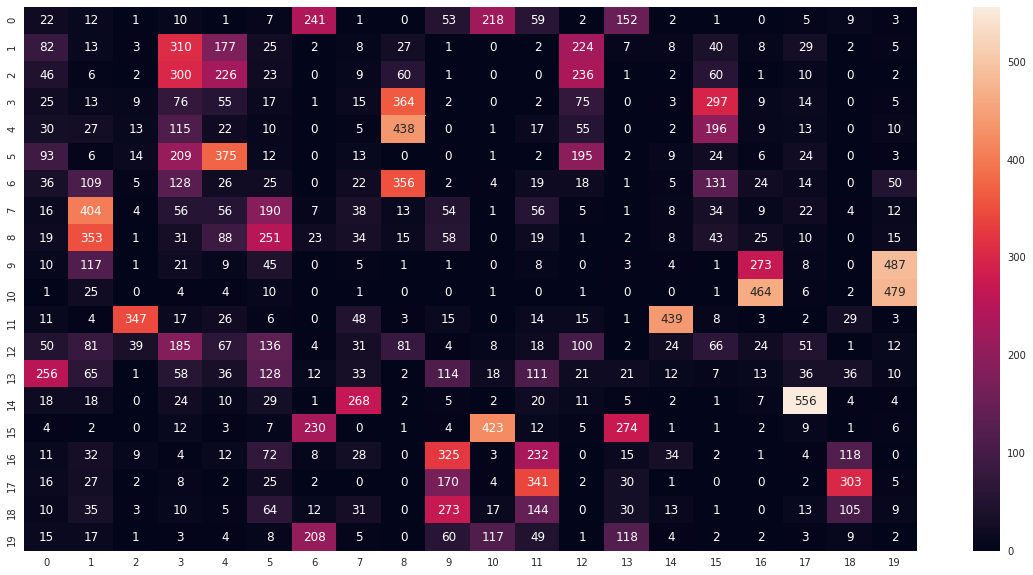

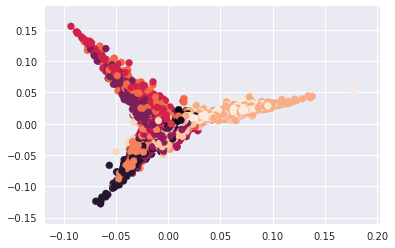

In [25]:
log_train_x = np.log(train_x + 1e-3)
normalized_train_x = normalize(log_train_x, norm='l2')
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=10, random_state=52)
km.fit(normalized_train_x)
print("Homogeneity: %0.3f" % homogeneity_score(train_y, km.labels_))
print("Completeness: %0.3f" % completeness_score(train_y, km.labels_))
print("V-measure: %0.3f" % v_measure_score(train_y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(train_y, km.labels_))
print("Adjusted Mutual Info: %.3f"
      % adjusted_mutual_info_score(train_y, km.labels_))
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(contingency_matrix(train_y, km.labels_), annot=True, fmt='d')
plt.show()

best_train = PCA(n_components = 2).fit_transform(train_x)

#km.fit(best_train)
#y_kmeans = km.predict(tfidf_train_x)
fig = plt.figure()

plt.scatter(best_train[:, 0], best_train[:, 1], c=km.labels_)

plt.show()